# Covid Country Analysis

# Load and Check dataset

In [139]:
# Load relevant libraries


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [141]:
# Load and check data
ds=pd.read_csv('aggregate_covid_country.csv')


In [142]:
ds.head()

,Date,Country,Confirmed,Recovered,Deaths
0,1/22/2020,Afghanistan,0,0,0
1,1/22/2020,Albania,0,0,0
2,1/22/2020,Algeria,0,0,0
3,1/22/2020,Andorra,0,0,0
4,1/22/2020,Angola,0,0,0


In [143]:
ds.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [144]:
ds.shape

(23688, 5)

In [145]:
ds.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [146]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


# Check and replace/remove null values

In [147]:
ds.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

# Exploring and visualising the data

In [148]:
# Show correlation table
dscor=ds.corr()
dscor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


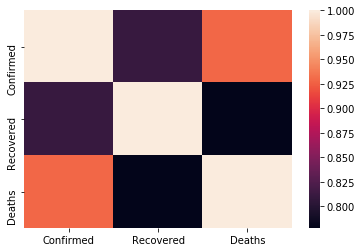

In [149]:
# Show correlation heatmap
sns.heatmap(dscor)

In [150]:
# Aggregate deaths by date
deaths_by_date = ds.groupby('Date').agg({'Deaths': ['sum']})
deaths_by_date

,Deaths
,sum
Date,
1/22/2020,17
1/23/2020,18
1/24/2020,26
1/25/2020,42
1/26/2020,56
...,...
5/5/2020,257239
5/6/2020,263855


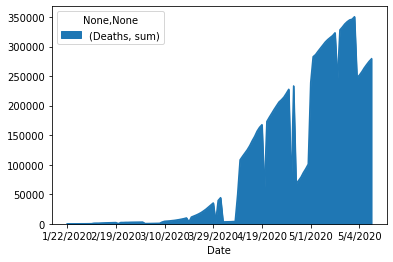

In [151]:
# Show area graph of deaths by date
deaths_by_date.plot.area()

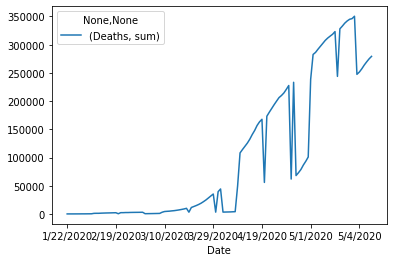

In [152]:
# Show line graph of deaths by date
deaths_by_date.plot.line()

In [153]:
# Calculate the total number of deaths so far
deaths_by_date.sum()

Deaths  sum    12482037
dtype: int64

In [154]:
# Show the total deaths by date
deaths_by_date.cumsum(axis=None, skipna=True)

,Deaths
,sum
Date,
1/22/2020,17
1/23/2020,35
1/24/2020,61
1/25/2020,103
1/26/2020,159
...,...
5/5/2020,11394406
5/6/2020,11658261


In [155]:
# Assign the total deaths by date to a new variable
Total_deaths_by_date=deaths_by_date.cumsum(axis=None, skipna=True)

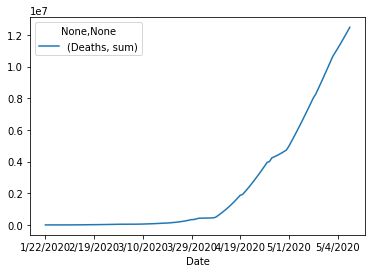

In [156]:
# Show line graph of total deaths by date
Total_deaths_by_date.plot.line()

In [157]:
# Aggregate deaths by country
deaths_by_country = ds.groupby('Country').agg({'Deaths': ['sum']})
deaths_by_country

,Deaths
,sum
Country,
Afghanistan,4669
Albania,1629
Algeria,23232
Andorra,2219
Angola,131
...,...
West Bank and Gaza,113
Western Sahara,1


# Add a new columns to the dataset that holds the total deaths and total confirmed cases

In [158]:
ds['Total_Deaths'] = ds['Deaths'].cumsum()
ds['Total_Confirmed_cases'] = ds['Confirmed'].cumsum()

In [159]:
ds.tail()

,Date,Country,Confirmed,Recovered,Deaths,Total_Deaths,Total_Confirmed_cases
23683,5/26/2020,West Bank and Gaza,429,365,3,12481976,188777144
23684,5/26/2020,Western Sahara,9,6,1,12481977,188777153
23685,5/26/2020,Yemen,249,10,49,12482026,188777402
23686,5/26/2020,Zambia,920,336,7,12482033,188778322
23687,5/26/2020,Zimbabwe,56,25,4,12482037,188778378


# Encode date and country columns to numerical values

In [160]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Date','Country']
for col in cols:
    ds[col] = le.fit_transform(ds[col])

In [161]:
ds.tail()

,Date,Country,Confirmed,Recovered,Deaths,Total_Deaths,Total_Confirmed_cases
23683,118,183,429,365,3,12481976,188777144
23684,118,184,9,6,1,12481977,188777153
23685,118,185,249,10,49,12482026,188777402
23686,118,186,920,336,7,12482033,188778322
23687,118,187,56,25,4,12482037,188778378


# Check and remove outliers ands skewness

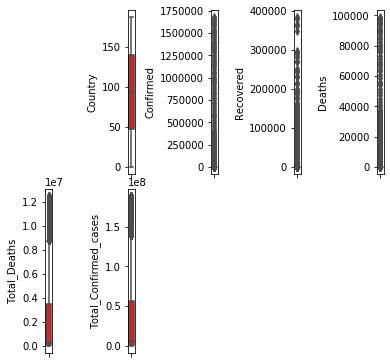

In [162]:
# Show boxplots for all columns, check outliers
collist=ds.columns.values
ncol=5
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [163]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(ds))
print(ds.shape)
cds=ds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(23688, 7)
(23166, 7)


In [164]:
cds=cds.drop(columns=['Recovered'])

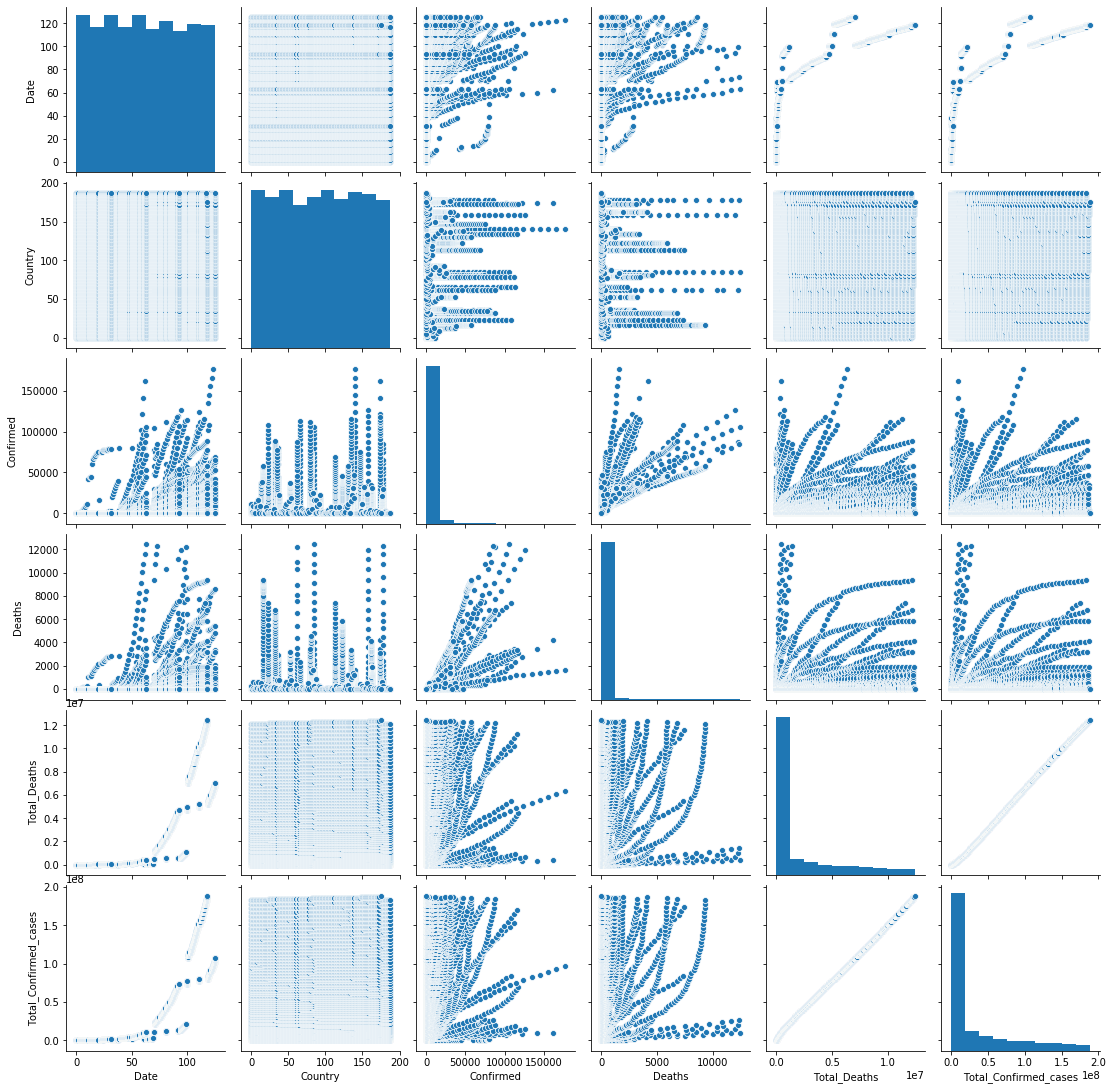

In [165]:
# Checking pairplots
sns.pairplot(cds)
plt.show()

# Linear regression between total confirmed cases and total deaths

Only linear regression was performed because the positive correlation between the confirmed cases and deaths were near perfect.

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [168]:
cds.columns

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Total_Deaths',
       'Total_Confirmed_cases'],
      dtype='object')

In [171]:
# Remove irrelevant columns
linds=cds.drop(columns=['Date', 'Country', 'Confirmed', 'Deaths'])

In [181]:
# Check and correct skewness
linds.skew()

Total_Deaths            -0.707816
Total_Confirmed_cases   -1.039422
dtype: float64

In [175]:
#Treating using log
for col in linds.columns:
    if linds.skew().loc[col]>0.55:
        linds[col]=np.log1p(linds[col])

In [176]:
linds.skew()

Total_Deaths            -0.707816
Total_Confirmed_cases   -1.039422
dtype: float64

In [184]:
# Reducing skewness using square root function
# Not sure why I'm getting this error - please advise
for col in linds.columns:
    if linds.skew.loc[col]>0.55:
        linds[col]=np.sqrt(linds[col])
linds.skew()


AttributeError: 'function' object has no attribute 'loc'

In [187]:
# Lineup target and input values
nds_x=linds.drop(columns=['Total_Deaths'])
nds_y=linds[['Total_Deaths']]

In [188]:
#Scaling for linear regression
sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [189]:
x.skew()

Total_Confirmed_cases   -1.039422
dtype: float64

In [190]:
# Train test split
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=55, test_size=0.20)

In [191]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 65 is 0.9942981990151224


In [192]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,nds_y,cv=10,scoring='r2').mean()

-0.07382730333798926

In [193]:
# R2 score gives us a rondom state of 65
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=65, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [194]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.9942981990151224
RMSE is:  0.24785159893513276


In [195]:
#save model as a pickle file
joblib.dump(lreg,'Total_deaths.pkl')

['Total_deaths.pkl']

Another option I looked at - not succesful but I would like to get feedback

Skewness is not adjusted because polynomial regression will be performed

In [166]:
cds.columns

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Total_Deaths',
       'Total_Confirmed_cases'],
      dtype='object')

In [196]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

In [197]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
    
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(cds_x) 
  
poly.fit(X_poly,cds_y) 
lin = LinearRegression() 
lin.fit(X_poly, cds_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

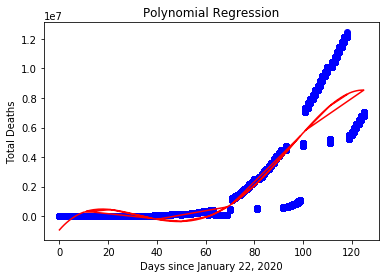

In [198]:
# Visualising the Polynomial Regression results 
plt.scatter(cds_x, cds_y, color = 'blue') 
  
plt.plot(cds_x, lin.predict(poly.fit_transform(cds_x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days since January 22, 2020') 
plt.ylabel('Total Deaths') 
  
plt.show() 

In [ ]:
# Predicting a new result with Polynomial Regression 
lin.predict(poly.fit_transform(130)) 